<a href="https://colab.research.google.com/github/MohammedMohsen0404/Projects_List/blob/main/Proj1_Insurance_Claim_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

**<center><h1>Insurance Claim Prediction</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

The Insurance Claim Prediction project falls under the **Classification Machine Learning Problem** category. The project aims to develop a machine learning model capable of accurately predicting whether an insurance claim will be made based on various personal and demographic attributes of the policyholder

# **Import Libraries and Data**
---

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [71]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download easonlai/sample-insurance-claim-prediction-dataset -f  insurance3r2.csv     #change

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/easonlai/sample-insurance-claim-prediction-dataset
License(s): other
insurance3r2.csv: Skipping, found more recently modified local copy (use --force to force download)


In [72]:
D = pd.read_csv('insurance3r2.csv')
data = D.copy()

# **Take a look at the data**
---

In [73]:
data.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [75]:
data.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [76]:
#data.select_dtypes(include=['object']).describe()

In [77]:
data['insuranceclaim'].value_counts()

insuranceclaim
1    783
0    555
Name: count, dtype: int64

imbalanced data , charges may has outliers

# **Exploratory Data Analysis**
---

**Univariate Analysis**

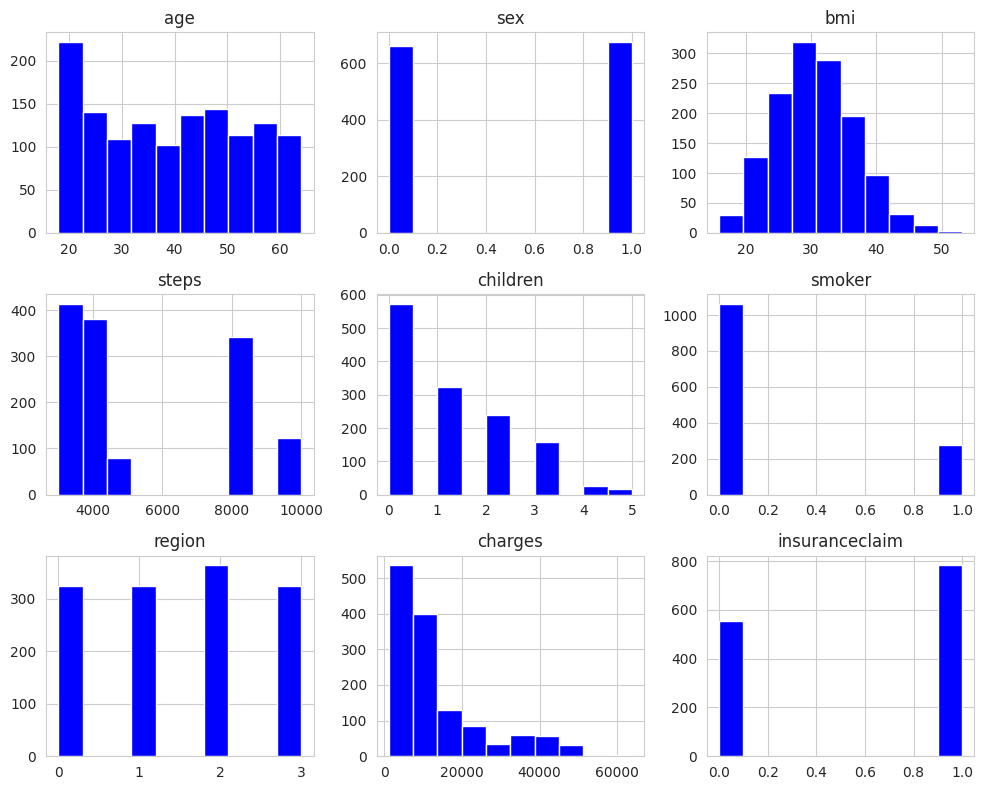

In [78]:
numerical_data = data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

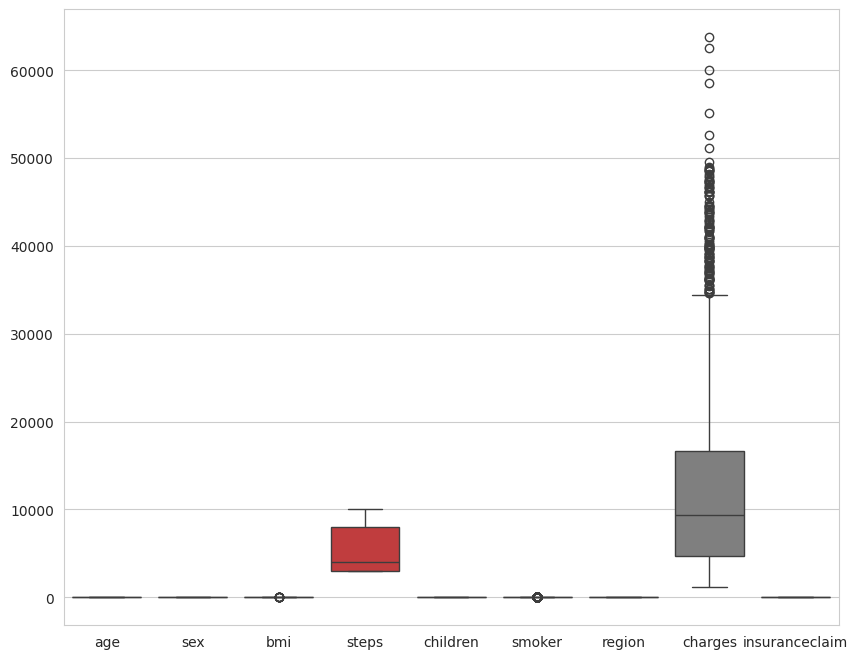

In [79]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.show()

In [80]:
categorical_data = data.select_dtypes(include='object')
for column in categorical_data.columns:
    sns.countplot(data=categorical_data, x=column, palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.show()

**Multivariate Analysis**

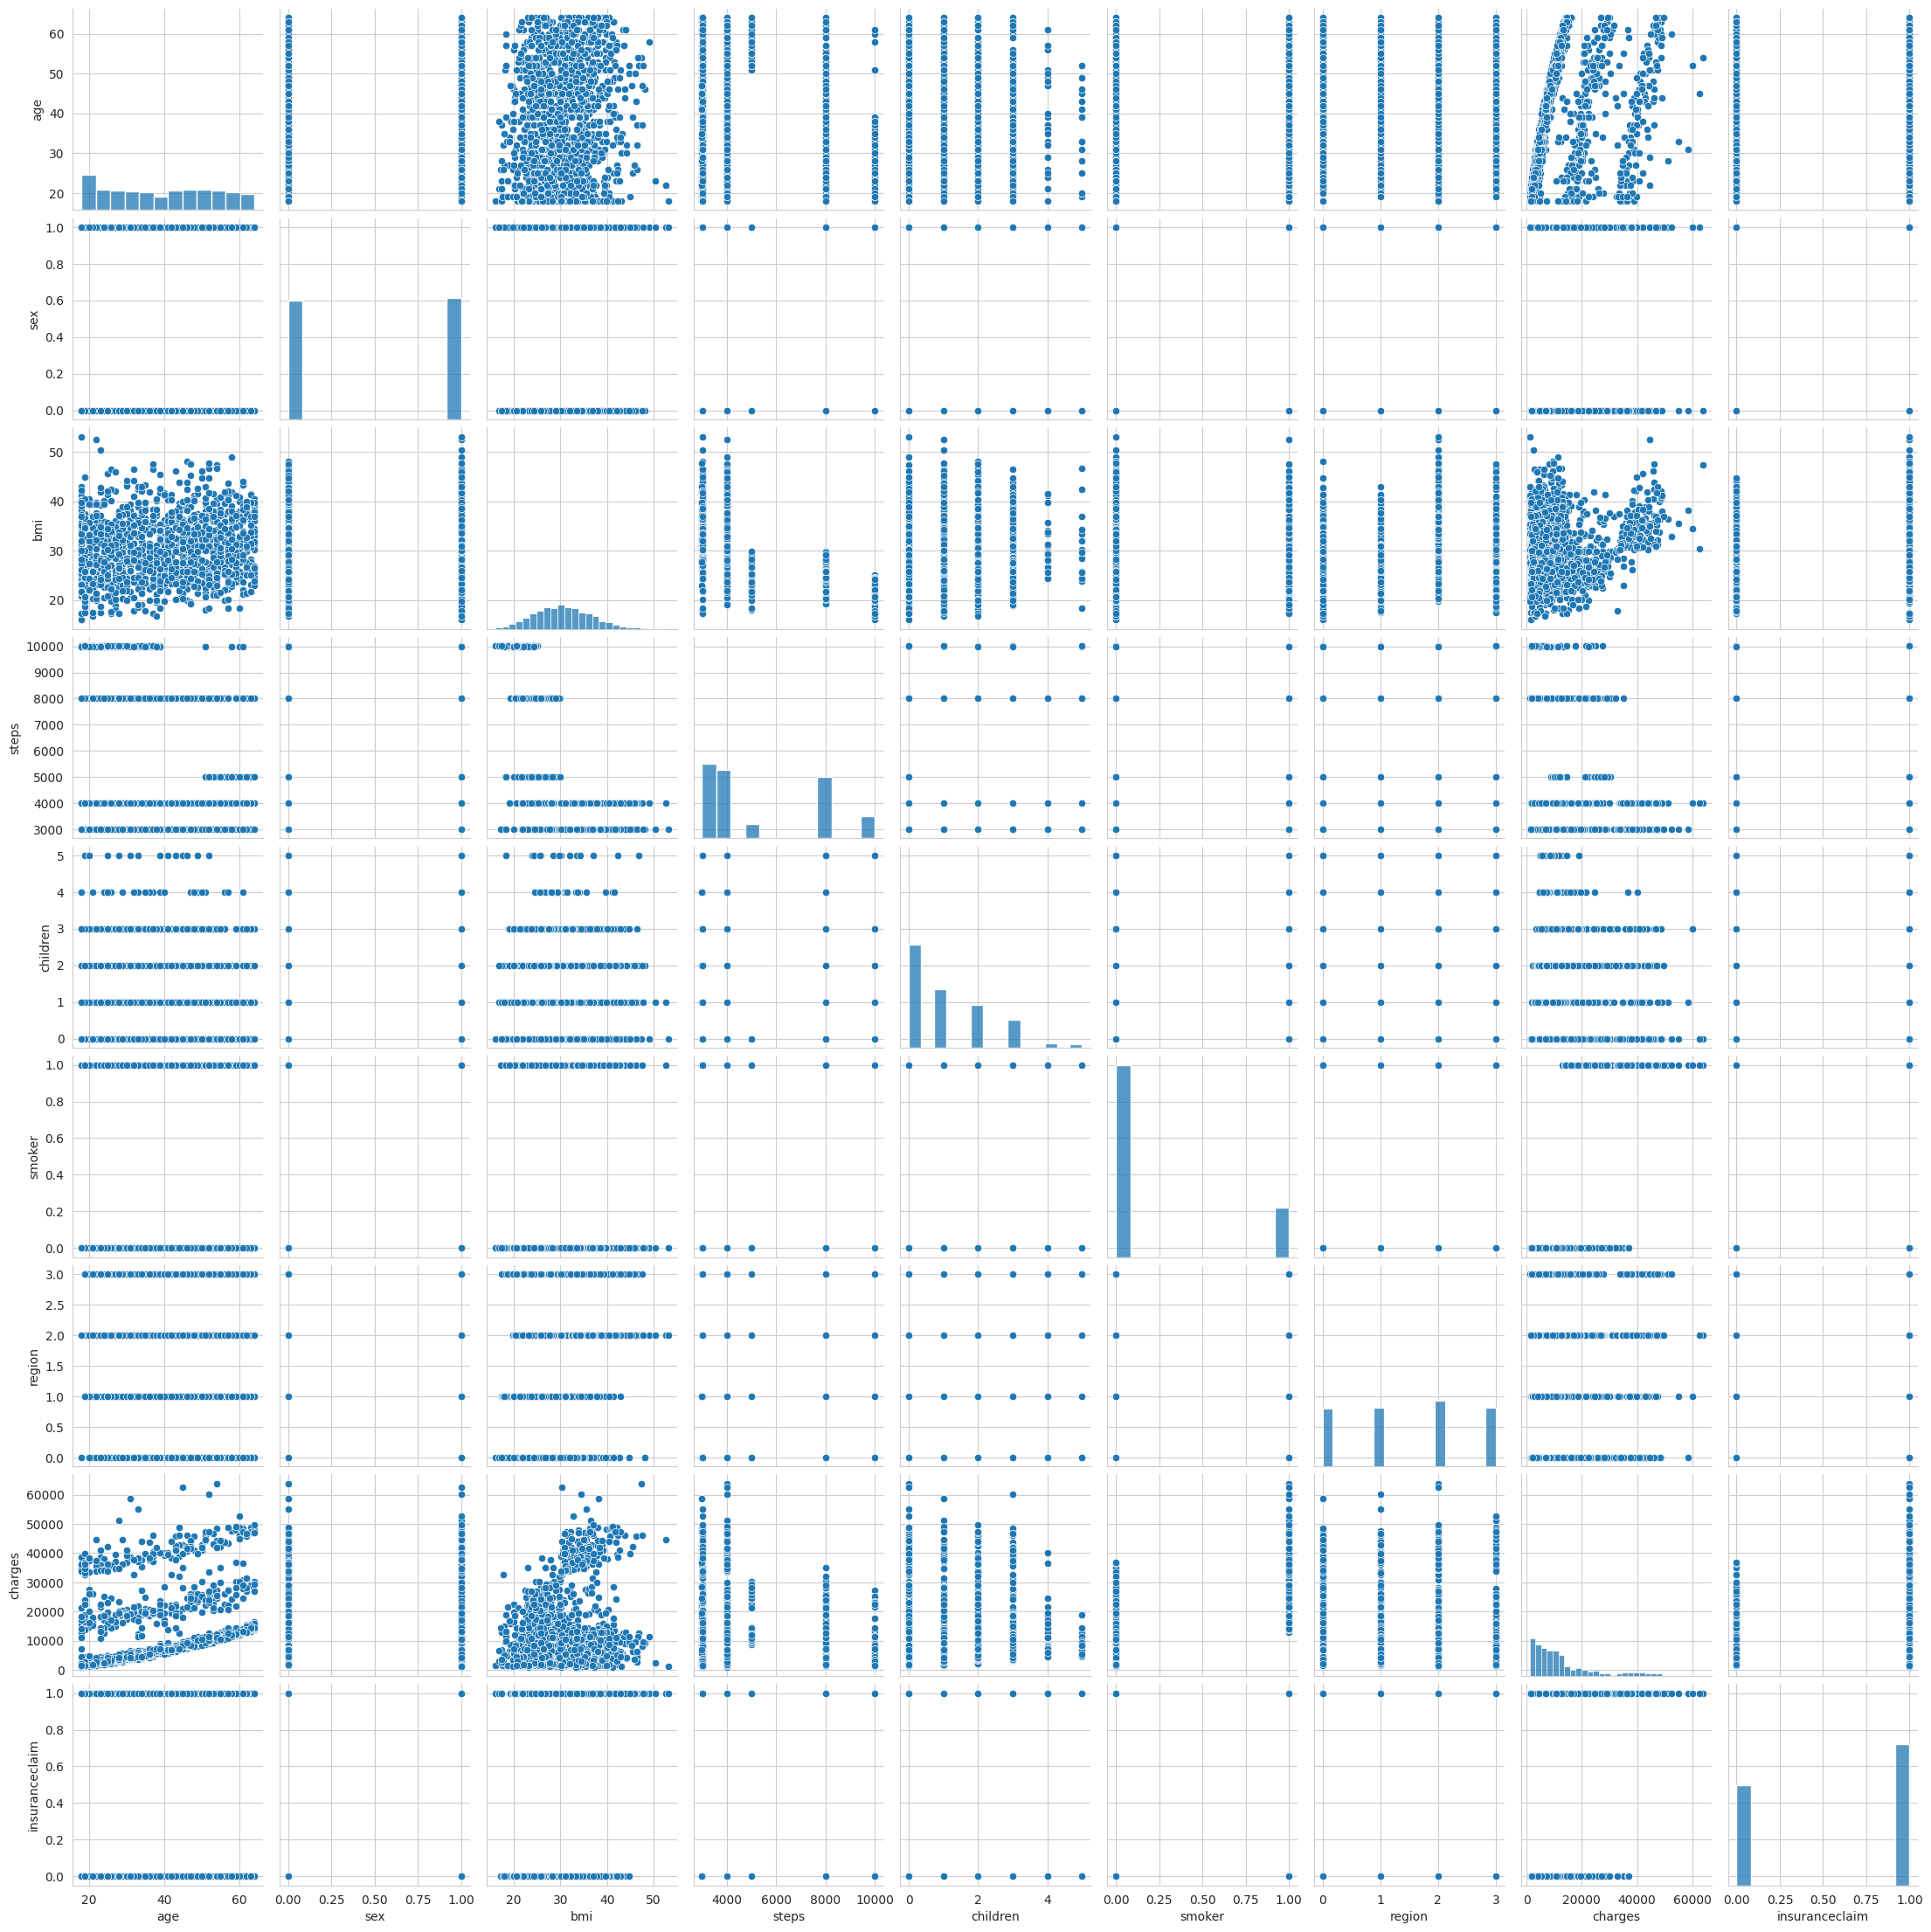

In [81]:
sns.pairplot(data.select_dtypes(include='number'))
plt.show()

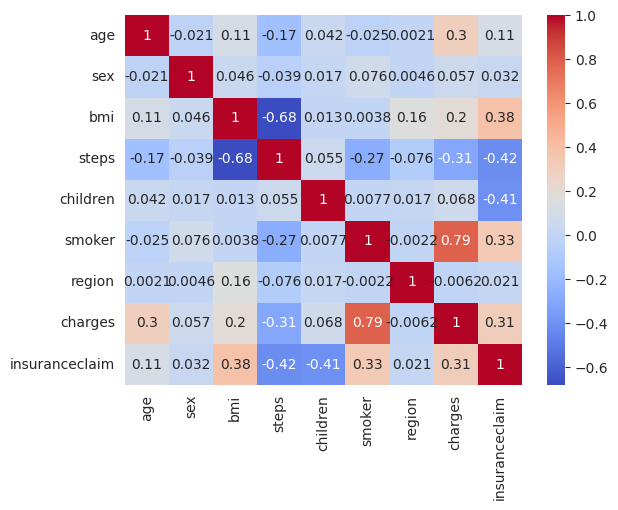

In [82]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Data Cleaning**
---

**Handling Duplicate Rows**

In [83]:
# Check for duplicate rows
duplicate_rows = data.duplicated()
# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


**Handling Missing Data**

In [84]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
steps,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0
insuranceclaim,0,0.0


In [85]:
total = data.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocesing**
----

It's important to conduct preprocessing steps separately on train, test sets to avoid data leakage, which can lead to overly optimistic performance estimates.
so let's split the data

**Data Splitting**

In [86]:
X = data.drop('insuranceclaim', axis = 1)
y = data.insuranceclaim

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=101,stratify=y)

**Encoding Categorical Variables**

In [88]:
#....

**Dealing with Outliers**

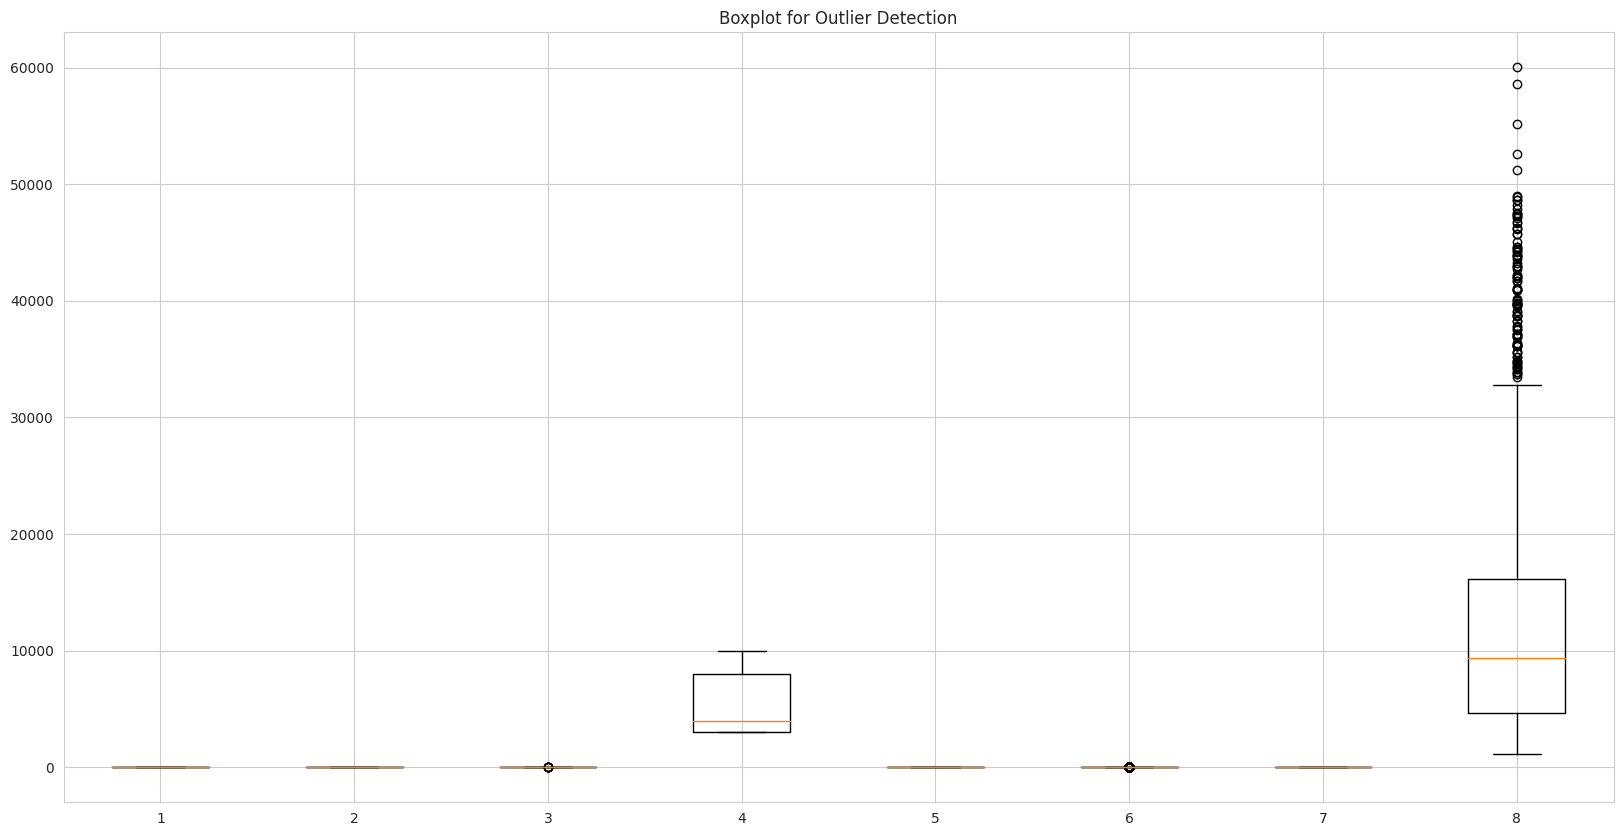

In [89]:
# Boxplot
plt.figure(figsize=(20, 10))
plt.boxplot(X_train)
plt.title('Boxplot for Outlier Detection')
plt.show()

In [90]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
outliers = X_train[((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Outliers using IQR method:")
print(outliers)

Outliers using IQR method:
      age  sex     bmi  steps  children  smoker  region      charges
373    26    1  32.900   4001         2       1       3  36085.21900
1118   33    1  35.750   4000         1       1       2  38282.74950
500    29    1  34.400   3000         0       1       3  36197.69900
664    64    0  22.990   5006         0       1       2  27037.91410
327    45    1  36.480   3001         2       1       1  42760.50220
...   ...  ...     ...    ...       ...     ...     ...          ...
261    20    0  26.840   4010         1       1       2  17085.26760
11     62    0  26.290   5004         0       1       2  27808.72510
668    62    1  32.015   4000         0       1       0  45710.20785
1184   23    0  28.490   4009         1       1       2  18328.23810
617    49    1  25.600   3007         2       1       3  23306.54700

[198 rows x 8 columns]


In [91]:
X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

**Data Normalization**

In [92]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# **Traditional models**
---

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report , f1_score

In [94]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('xgboost', xgb.XGBClassifier(tree_method="hist")),
]

In [95]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class classification
    print(f'{clf_name}: F1 Score = {f1:.2f}')
    print(f'{clf_name} Classification Report:\n{classification_report(y_test, y_pred)}')
    print('---------------------------------------------------')

Logistic Regression: F1 Score = 0.88
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       167
           1       0.90      0.89      0.90       235

    accuracy                           0.88       402
   macro avg       0.87      0.88      0.87       402
weighted avg       0.88      0.88      0.88       402

---------------------------------------------------
Random Forest: F1 Score = 0.94
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       167
           1       0.96      0.93      0.95       235

    accuracy                           0.94       402
   macro avg       0.94      0.94      0.94       402
weighted avg       0.94      0.94      0.94       402

---------------------------------------------------
Gradient Boosting: F1 Score = 0.98
Gradient Boosting Classification Report:
              prec